![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 12 - Árboles de decisión

Los árboles de decisión son modelos ampliamente utilizados para resolver tareas de regresión y de clasificación. En esta sesión vamos a centrarnos en su uso para tareas de clasificación binaria, pero más adelante los utilizaremos para resolver tareas de regresión y de clasificación multiclase.

Lo que hacen los árboles de clasificación es tratar de identificar grupos de ejemplos que comparten la misma clase y para ello formulan sentencias del tipo si-entonces: *si el atributo color es rojo entonces es de la clase 1*. Evidentemente, será casi imposible que una única sentencia de este tipo sirva para discriminar de manera perfecta entre los ejemplos de ambas clases, así que se suelen encadenar varias sentencias de este tipo formando un árbol.

Los árboles de decisión cobran especial relevancia puesto que tienen una gran capacidad de explicación: los humanos podemos visualizar el árbol y comprender las razones por las que el modelo realiza las predicciones.

## 12.1 Crear y visualizar el árbol

Para crear un árbol de decisión de clasificación `Scikit-learn` cuenta con la clase `DecisionTreeClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Veamos un sencillo ejemplo en el que disponemos de dos clases fácilmente separables:

![Conjunto de datos sencillo](fig_conjunto_de_datos_sencillo.png) 

Estos datos están contenidos en la pestaña 'Conjunto de datos 1' de la hoja de cálculo **ejemplo.xlsx**.

Lo primero que haremos será cargar los datos y separar los atributos (`X`) de la clase (`y`):





In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn import metrics
from IPython.display import Image

# se cargan los datos de la pestaña 'Conjunto de datos 1'
df = pd.read_excel('ejemplo.xlsx', sheet_name='Conjunto de datos 1')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]
display(X)

# separamos la clase
y = df.iloc[:,(columnas-1)]
display(y)

,x1,x2
0,0.995488,5.701968
1,0.997152,4.386015
2,0.996028,9.883738
3,0.995449,1.020448
4,0.994237,2.088768
...,...,...
95,1.070389,24.522940
96,1.010023,11.370731
97,1.091948,12.717824
98,1.071424,2.901458


0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: clase, Length: 100, dtype: int64

Ahora ya podemos crear una instancia de la clase `DecisionTreeClassifier` para crear un modelo qye habrá que entrenar.

Como en cada partición que vaya a efectuar el árbol se reordenan al azar los atributos (antes de realizar los análisis pertinentes) es necesario fijar la semilla de números aleatorios si queremos que los resultados sean reproducibles.

In [3]:
# se crea una instancia de DecisionTreeClassifier
# si queremos que los resultados sean reproducibles debemos fijar semilla de aleatorios
sys_dt = DecisionTreeClassifier(random_state=1234)

# se entrena el árbol de decisión
sys_dt.fit(X, y)

DecisionTreeClassifier(random_state=1234)

Una vez entrenado el modelo podemos visualizar el árbol de decisión que se ha creado. Una manera de hacerlo es utilizando la función `export_graphviz()`: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz 

Esta función genera una representación del árbol en formato texto siguiendo la sintaxis del formato **dot** de GraphViz.

Tiene muchas posibilidades, pero lo más sencillo es darle como argumento el árbol de decisión entrenado (`decision_tree`), el nombre de los atributos (`feature_names`) y los nombres de las clases (`class_names`). Otros parámetros interesantes de esta función son `out_file`, que permite guardar en un fichero el resultado, y `filled`, que posibilita el uso de color en la representación del árbol.

Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x1 <= 1.001\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = 0", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = 0", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 50\nvalue = [0, 50]\nclass = 1", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


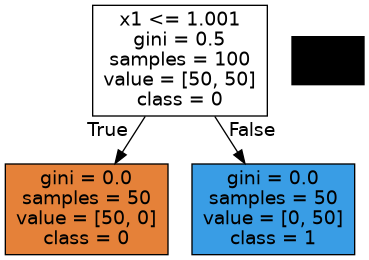

In [4]:
# se obtiene la representación en formato 'dot' del árbol de decisión
dot_data = export_graphviz(decision_tree=sys_dt, feature_names=X.columns, class_names=['0', '1'], filled=True)

# se transforma la representación de árbol en formato 'dot' a formato gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
print("Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/")
print(dot_data)

# lo podemos almacenar en un fichero
graph.write_png("árbol sencillo.png")

# lo podemos visualizar directamente
Image(graph.create_png())

Una vez que se tiene el árbol en formato dot podemos pasarlo a formato gráfico utilizando la función `graph_from_dot_data` del módulo `pydotplus` y guardarlo en un fichero o visualizarlo utilizando las funciones `write_png()` o `create_png()`.

Para que todo esto funcione es necesario tener instalado GraphViz en el ordenador.

El resultado que obtenemos mustra un árbos de decisión muy reducido. En el nodo raíz se muestra la condición (`x1<=1.001`), que si es cierta no llevará a la hoja de la izquierda (que es de la clase 0) y si es falsa a la de la derecha (clase 0). En el nodo raíz vemos que nos dice que cuenta con 100 ejemplos, que son todos, de los cuales 50 son de la clase 0 y 50 de la clase 1. Como hay un empate, ese nodo se etiqueta con cualquiera de las dos clases (en este caso clase 0).

Vemos que ese nodo también indica `gini=0.5`. `gini` mide el grado de impureza de un nodo y puede variar entre 0 y 1. En el nodo raíz vemos que presenta 0.5, pero en las hojas del árbol vemos que es 0 ya que solo contienen ejemplos de una clase. A la hora de crear el árbol de decisión se intenta poner en los nodos las condiciones que más puereza dan a los nodos y que dan como resultado un árbol más pequeño y generalizable. `gini` se utiliza para elegir esas condiciones, aunque otro criterio muy utilizado es la `entropy` y se puede elegir el criterio que queramos utilizando `criterion='citerio'` en el `DecisionTreeClassifier`.

Este problema era muy sencillo, así que vamos a complicarlo un poco cambiando de clase algunos de los ejemplos en la zona central:

![Conjunto de datos un poco más complicado](fig_conjunto_de_datos_2.png) 

Estos datos están en la pestaña 'Conjunto de datos 2' de la misma hoja de cálculo:

In [5]:
# se cargan los datos de la pestaña 'Conjunto de datos 2'
df = pd.read_excel('ejemplo.xlsx', sheet_name='Conjunto de datos 2')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]
display(X)

# separamos la clase
y = df.iloc[:,(columnas-1)]
display(y)

,x1,x2
0,0.995488,5.701968
1,0.997152,4.386015
2,0.996028,9.883738
3,0.995449,1.020448
4,0.994237,2.088768
...,...,...
95,1.080619,36.977540
96,1.010023,11.370731
97,1.091948,12.717824
98,1.071424,2.901458


0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: clase, Length: 100, dtype: int64

Así que vamos a reentrenar el modelo con estos nuevos datos y a visualizar el árbol resultante:

Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x1 <= 1.001\ngini = 0.493\nsamples = 100\nvalue = [56, 44]\nclass = 0", fillcolor="#f9e4d5"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = 0", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x1 <= 1.065\ngini = 0.211\nsamples = 50\nvalue = [6, 44]\nclass = 1", fillcolor="#54aae9"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 28\nvalue = [0, 28]\nclass = 1", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="x1 <= 1.073\ngini = 0.397\nsamples = 22\nvalue = [6, 16]\nclass = 1", fillcolor="#83c2ef"] ;
2 -> 4 ;
5 [label="x2 <= 16.552\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = 0", fillcolor="#f2c09c"] ;
4 -> 5 ;
6 [label="

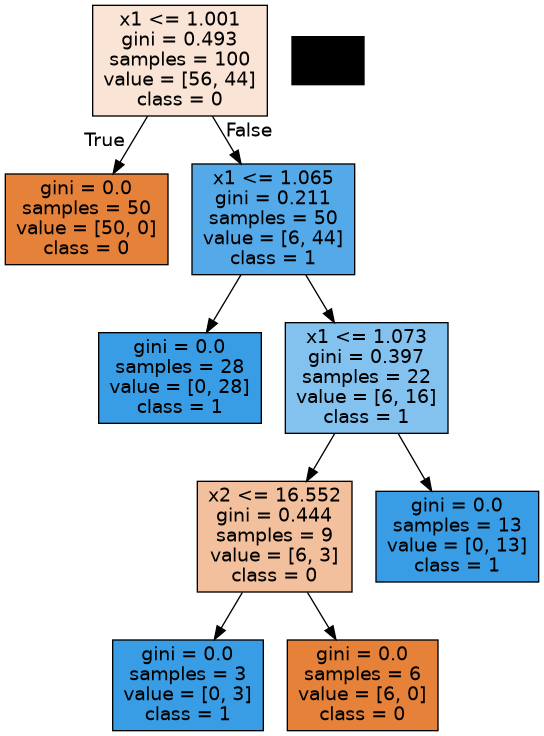

In [6]:
# se entrena el árbol de decisión
sys_dt.fit(X, y)

# se obtiene la representación en formato 'dot' del árbol de decisión
dot_data = export_graphviz(decision_tree=sys_dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
print("Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/")
print(dot_data)

# se transforma la representación de árbol en formato 'dot' a formato gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# y lo visualizamos
Image(graph.create_png())

En este caso el árbol es un poco más complejo y da lugar a la separación del espacio que se muestra a continuación:

![resultado](fig_conjunto_de_datos_2_marcado.png) 


## 12.2 Estructura y tamaño del árbol

Vamos a cargar un conjunto de datos con algún atributo más y vamos a ver qué arbol genera:

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

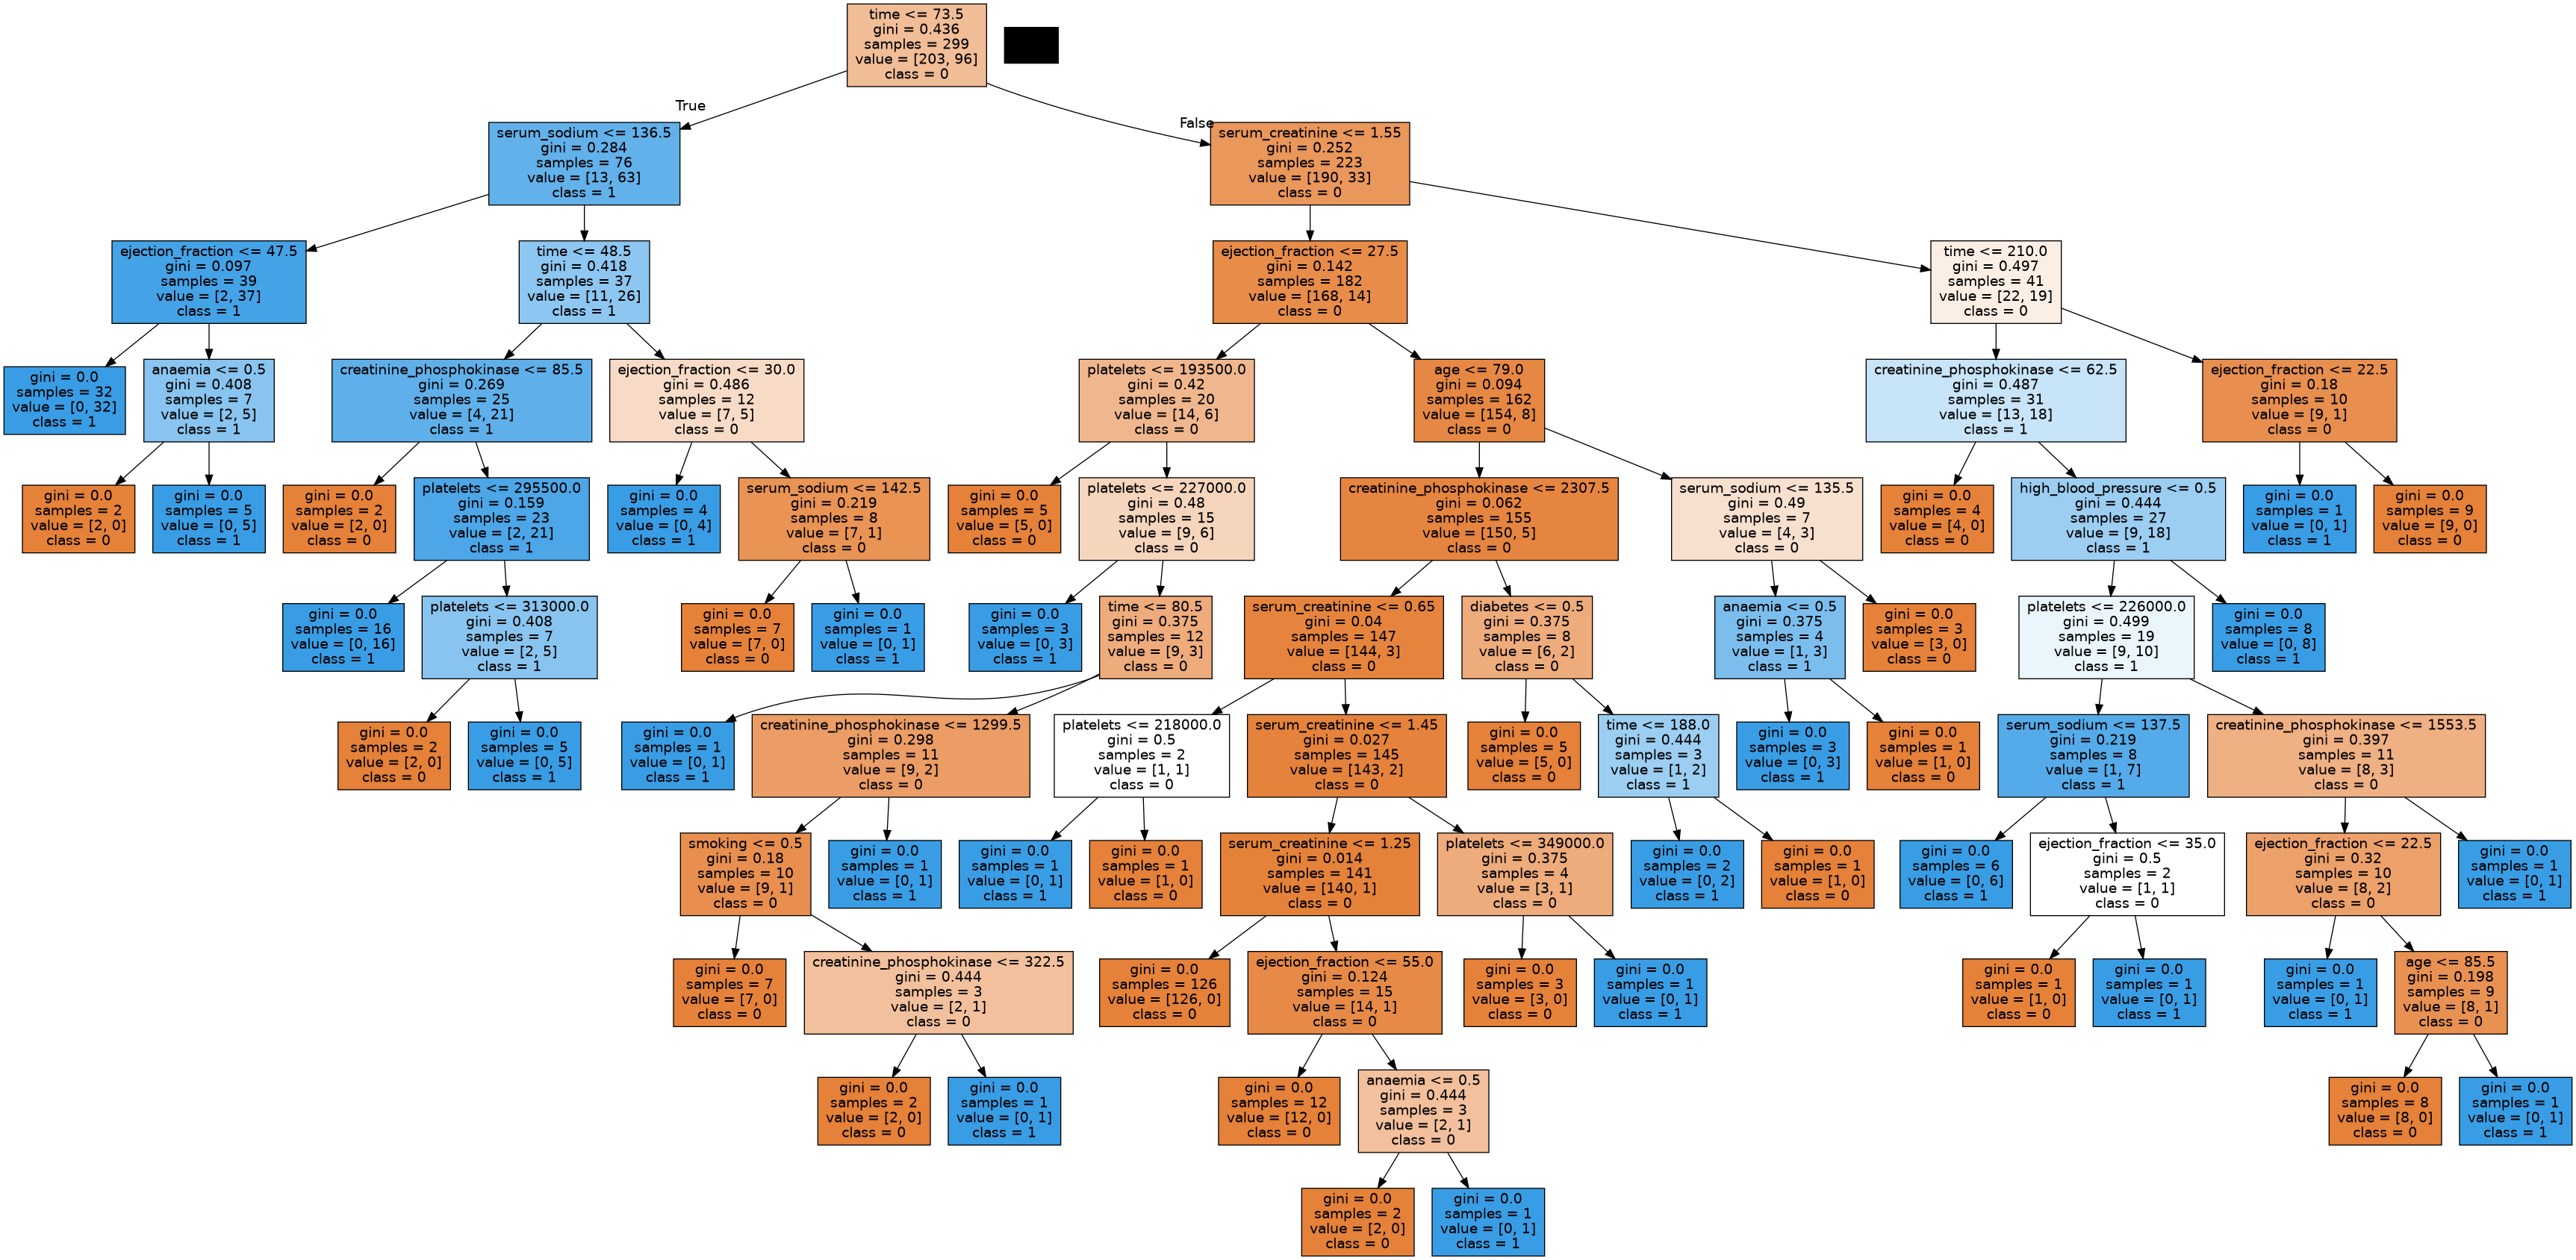

In [7]:
# se llama a la función read_csv
# no tiene missing y las columnas están separadas por ','. Tiene cabecera
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', header=0)
filas, columnas = df.shape

# la clase está en la última columna 
# separamos los atributos y los almacenamos en X
X = df.iloc[:,0:(columnas-1)]
display(X)

# separamos la clase y la almacenamos en Y
y = df.iloc[:,(columnas-1)]
display(y)

# se crea una instancia de DecisionTreeClassifier
sys_dt = DecisionTreeClassifier(random_state=1234)

# se entrena el árbol de decisión
sys_dt.fit(X, y)

# se obtiene la representación en formato 'dot' del árbol de decisión
dot_data = export_graphviz(decision_tree=sys_dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
# print("Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/")
# print(dot_data)

# se transforma la representación de árbol en formato 'dot' a formato gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# lo almacenamos en un fichero para poder visualizarlo mejor
graph.write_png("árbol heart failure.png")

# lo visualizamos
Image(graph.create_png())

El árbol resultante es un árbol de decisión bastante extenso. Esto es así porque durante el aprendizaje los nodos se expanden hasta que todas las hojas son *puras* (tienen ejemplos sólo de una clase) o hasta que contengan menos de un número de terminado de ejemplos, que por defecto es `min_samples_split=2`.

Si ahora evaluamos sobre el mismo conjunto de datos (reescritura o resubstitution) vemos que se acierta todo:

In [8]:
y_pred = sys_dt.predict(X)
print("Accuracy : %.4f" % metrics.accuracy_score(y, y_pred))

Accuracy : 1.0000


`DecisionTreeClassifier` presenta una serie de hiperparámetros que nos permiten controlar la estructura y el tamaño del árbol:
- `max_depth`, profundidad máxima del árbol.
- `min_samples_split`, mínimo número de ejemplos que debe tener un nodo para ser dividido.
- `min_samples_leaf`, mínimo número de ejemplos requeridos en una hoja.
- `max_leaf_nodes`, máximo número de hojas.
- `min_impurity_decrease`, mímino decrecimiento requerido de la impureza para aceptar una división.

Si bien es útil saber que existen estos hiperparámetros, lo más probable es que solo usemos `max_ depth` y `min_impurity_decrease` puesto que los árboles menos profundos (a veces llamados tocones o *shallower trees*) son modelos más simples y, por lo tanto, tienen una varianza más baja.

Vamos a probar a limitar la profundidad:

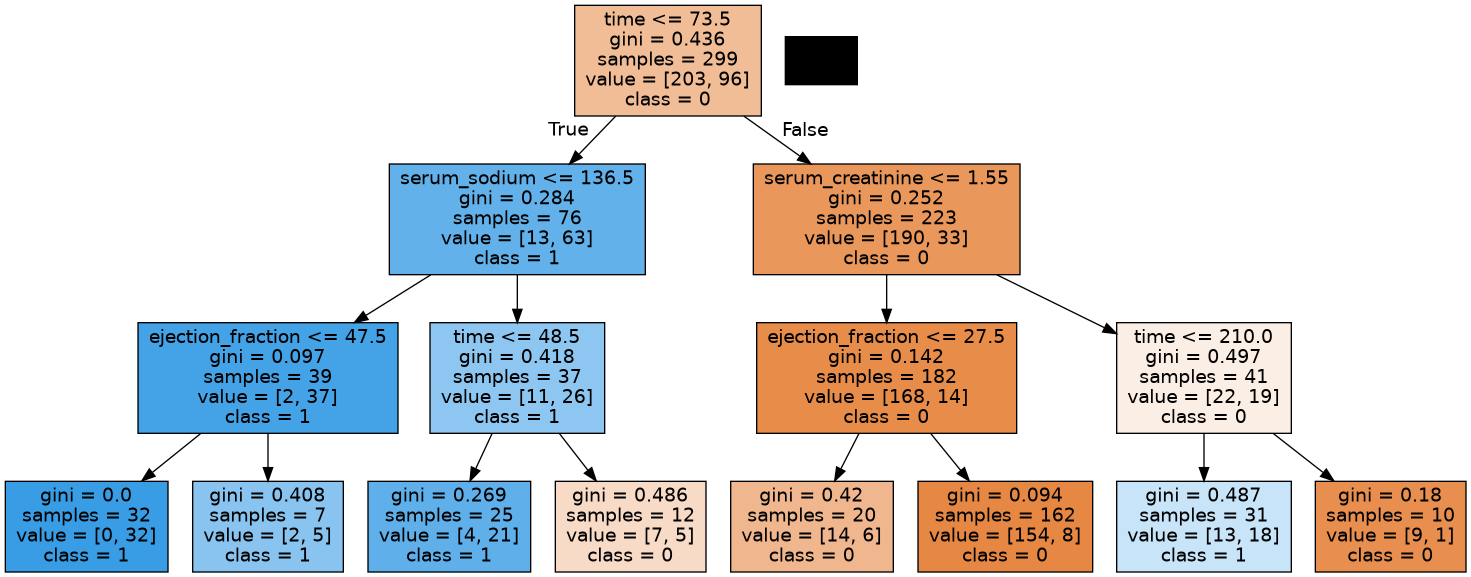

In [9]:
# se crea una instancia de DecisionTreeClassifier limitando la profundidad
sys_dt = DecisionTreeClassifier(random_state=1234, max_depth=3)

# se entrena el árbol de decisión
sys_dt.fit(X, y)

# se obtiene la representación en formato 'dot' del árbol de decisión
dot_data = export_graphviz(decision_tree=sys_dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
#print("Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/")
#print(dot_data)

# se transforma la representación de árbol en formato 'dot' a formato gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# lo visualizamos
Image(graph.create_png())

Como limitamos en profundidad, todas las ramas tienen la misma extensión.

Evaluando este árbol en reescritura vemos que sus resultados son necesariamente peores, puesto que le estamos limitando su capacidad de crecer, sin embargo, no tiene por qué ser peor evaluándolo ante un conjunto de casos no vistos durante el entrenamiento.

In [10]:
y_pred = sys_dt.predict(X)
print("Accuracy : %.4f" % metrics.accuracy_score(y, y_pred))

Accuracy : 0.8696


Vemos en el árbol que algunas hojas son claramente de una u otra clase, sin embargo, hay otras hojas en las que hay casi tantos ejemplos de la clase 0 como de la clase 1 e igual nos habría gustado extender esas ramas un poco más.

Si queremos extender las ramas en función de lo que pueden mejorar en la clasificación, debemos indicar la mejora mínima en la impureza necesaria para admitir una división:

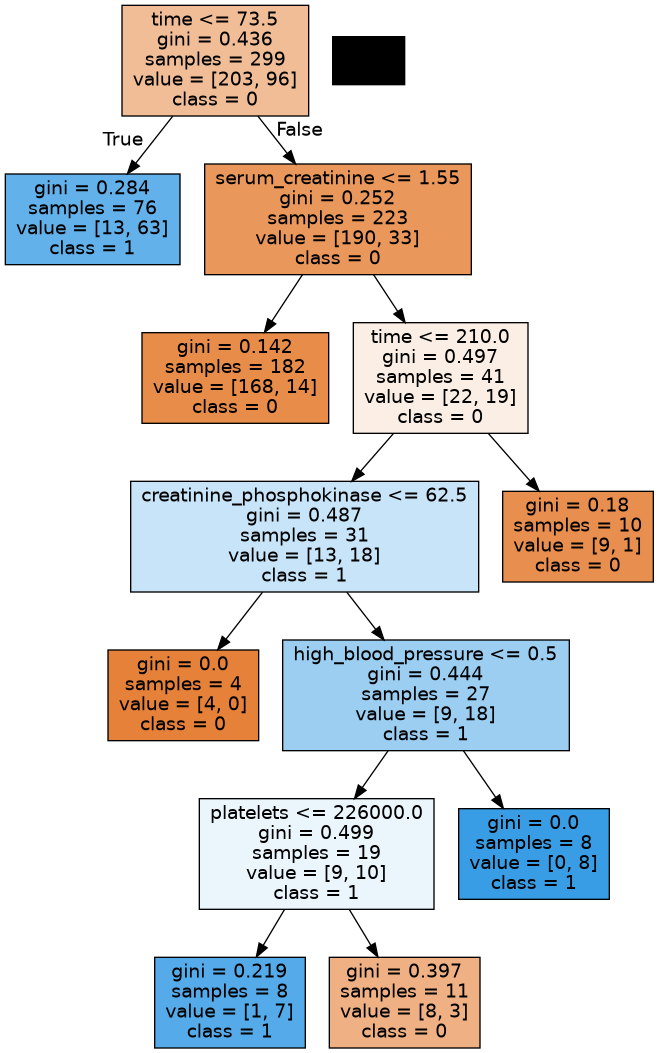

In [11]:
# se crea una instancia de DecisionTreeClassifier indicando la mínima mejora en impureza
sys_dt = DecisionTreeClassifier(random_state=1234, min_impurity_decrease=0.008)

# se entrena el árbol de decisión
sys_dt.fit(X, y)

# se obtiene la representación en formato 'dot' del árbol de decisión
dot_data = export_graphviz(decision_tree=sys_dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
#print("Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/")
#print(dot_data)

# se transforma la representación de árbol en formato 'dot' a formato gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# lo visualizamos
Image(graph.create_png())

Ahora obtenemos un árbol que se ha adaptado mejor a la dificultad de cada rama y obtenemos un resultado un poco mejor en reescritura:

In [12]:
y_pred = sys_dt.predict(X)
print("Accuracy : %.4f" % metrics.accuracy_score(y, y_pred))

Accuracy : 0.8930


Os podéis estar preguntando por qué he seleccionado en un caso `max_depth=3` y en el otro `min_impurity_decrease=0.008`. La respuesta es muy simple, he estado probando valores hasta que han resultado árboles que me servían para la explicación. No sé si son los mejores valores posibles para estos hiperparámetros en este conjuntos de datos, para saberlo deberíamos realizar la búsqueda de hiperparámetros vista en sesiones anteriores.

Tampoco sé si estos árboles son mejores o peores de cara a clasificar ejemplos no vistos durante el entrenamiento, para saberlo también deberíamos realizar los experimentos vistos en sesiones anteriores.


## Ejercicios

1. Carga el fichero **heart_failure_clinical_records_dataset.csv** (es un archivo de texto). 
2. Realiza una validación cruzada de 5 folds con tres árboles: i) árbol por defecto, ii) árbol con `max_depth=3` y iii) árbol con `min_impurity_decrease=0.008`. Compara los resultados entre sí y con los obtenidos por un baseline.
3. Haz una `RandomizedSearchCV` para buscar los mejores hiperparámetros. Que `max_depth`  tome valores entre 1 y 3 y que `min_impurity_decrease` tome valores entre 0 y 0.03. La función `uniform` de `scipy` te puede servir de ayuda: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html 
4. Muestra el árbol que se obtiene con los mejores hiperparámetros

Estos ejercicios no es necesario entregarlos.